In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    response = requests.get(url)

    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"Not Verified | Jan 30th, I booked a last-minut..."
1,✅ Trip Verified | I am a British Airways Gold ...
2,Not Verified | Another case of reviewing Brit...
3,✅ Trip Verified | On the memorable day of Janu...
4,Not Verified | I did not actually get to fly w...


In [4]:
df = df.rename(columns={'':'Reviews'})

In [5]:
df.head()

,reviews
0,"Not Verified | Jan 30th, I booked a last-minut..."
1,✅ Trip Verified | I am a British Airways Gold ...
2,Not Verified | Another case of reviewing Brit...
3,✅ Trip Verified | On the memorable day of Janu...
4,Not Verified | I did not actually get to fly w...


In [6]:
prefix_to_remove = '✅ Trip Verified | '
df = df.applymap(lambda x: x.replace(prefix_to_remove, ''))

In [7]:
df

,reviews
0,"Not Verified | Jan 30th, I booked a last-minut..."
1,I am a British Airways Gold Guest List member ...
2,Not Verified | Another case of reviewing Brit...
3,"On the memorable day of January 9th, my family..."
4,Not Verified | I did not actually get to fly w...
...,...
995,Edinburgh to Boston via London. The planes are...
996,Gatwick to Mauritius. My wife and 2 friends b...
997,Not Verified | Flew out of Heathrow on 22nd F...
998,Horrible flight BA from Gatwick to Cape Town ...


Let's Perform Word Cloud on the Data:

In [8]:
pip install wordcloud

In [9]:
import PIL.Image

In [10]:
from wordcloud import WordCloud

In [12]:
import matplotlib.pyplot as plt

In [18]:
#Lowercasing Text
df['reviews'] = df['reviews'].str.lower()
#Removing Punctuation
df['reviews'] = df['reviews'].str.replace('[^\w\s]', '')

#Concatinate all the Text
text = ' '.join(df['reviews'].tolist())

<ipython-input-18-66430113e5b1>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('[^\w\s]', '')


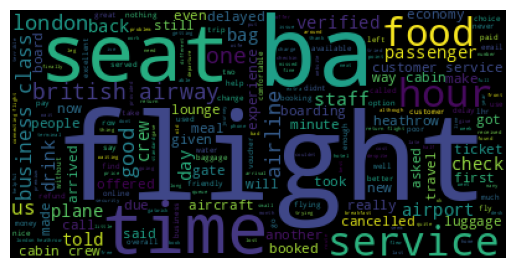

In [19]:
wc = WordCloud().generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()